In [1]:
import pandas as pd
from pyannote.core import PYANNOTE_URI, PYANNOTE_SEGMENT, PYANNOTE_LABEL, PYANNOTE_TRACK
from pyannote.core import Annotation, Segment
from pyannote.metrics.diarization import DiarizationErrorRate
from collections import OrderedDict
from s4d import Diar
from concurrent import futures

/home/usman/sde/venv3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/usman/sde/venv3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Import theano


ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [2]:
test_set = ['ES2004', 'ES2014', 'IS1009', 'TS3003', 'TS3007', 'EN2002']
dir = 'out-class-test'

In [3]:
import os, re
files = os.listdir('source.files/')
indices = []
for temp in test_set:
    for index, value in enumerate(files):
        if re.search('{}.*'.format(temp), value):
            indices.append(index)

In [4]:
filtered_test_set = []
for value in indices:
    filtered_test_set.append(files[value])

In [5]:
filtered_train_set = files.copy()
for value in filtered_test_set:
    index = filtered_train_set.index(value)
    filtered_train_set.pop(index)

In [6]:
def mdtm_convert_to_annote(rate, filename=None, flag='seg'):
    cols = [PYANNOTE_TRACK, 'channel_no', PYANNOTE_SEGMENT,\
            'duration', 'speaker', 'trash1', 'trash2', PYANNOTE_LABEL]
    #df = pd.read_csv(filename, header=None, sep=' ', names=cols)
    if flag == 'seg':
        df = Diar.read_seg(filename)
    if flag == 'mdtm':
        df = Diar.read_mdtm(filename)
    temp_annotation = Annotation(uri=filename)
    for row in df:
        start = row['start']*rate
        stop = row['stop']*rate
        label = row['cluster']
        filename = row['show']
        #print(start, stop, label, filename)
        temp_annotation[Segment(start, stop), filename] = label
    return temp_annotation.copy()

In [7]:
def parallel_der_calc(file_name):
    result_file = os.path.join(result_dir, file_name)
    hyp = mdtm_convert_to_annote(.01, result_file, 'seg')
    diarizationErrorRate = DiarizationErrorRate(skip_overlap=True, collar=.25)
    der = diarizationErrorRate(ref, hyp)
    return der, file_name

In [114]:
def parallel_der_calc_v2(file_name):
    result_file = os.path.join(result_dir, file_name)
    hyp = mdtm_convert_to_annote(.01, result_file, 'seg')        
    der = diarizationErrorRate(ref, hyp)
    return der, file_name

In [96]:
import logging

In [101]:
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)


In [8]:
files = []
#results_der = OrderedDict()
#results_hyp = OrderedDict()
results_filename = OrderedDict()
#results_der_fn = OrderedDict()
#refs = OrderedDict()
#hyps = OrderedDict()

for fn in filtered_train_set:
    #print(fn)
    result_dir = os.path.join(dir, fn, 'results.vit')
    ref_file = os.path.join('mdtm', fn + '.mdtm')
    files = os.listdir(result_dir)
    #print(ref_file)
    ref = mdtm_convert_to_annote(.01, ref_file, 'mdtm')
    """
    diarizationErrorRate = DiarizationErrorRate(skip_overlap=True, collar=.25)
    if fn not in refs.keys():
        refs[fn] = []
        refs[fn].append(ref)
        #results_hyp[file_name] = []
    """
    
    with futures.ProcessPoolExecutor() as pool:
        values = pool.map(parallel_der_calc, files)
        for der, file_name in values:
            #if file_name not in results_der.keys():
            #    results_der[file_name] = []
                #results_hyp[file_name] = []
            if file_name not in results_filename.keys():
                results_filename[file_name] = []
                #results_der_fn[fn] = []
            #results_der[file_name].append(der)
            #results_hyp[file_name].append(hyp)
            results_filename[file_name].append(der)
            #results_der_fn[fn].append(der)
    
            
    """
    for file_name in files:
        result_file = os.path.join(result_dir, file_name)
        hyp = mdtm_convert_to_annote(.01, result_file, 'seg')        
        #diarizationErrorRate = DiarizationErrorRate(skip_overlap=True, collar=.25)
        print(ref)
        #diarizationErrorRate(ref, hyp)
        #print("DER = {0:.3f}".format(der))
        if fn not in hyps.keys():
            hyps[fn] = []
            #hyps[fn].append(hyp)
        hyps[fn].append(hyp)    
        #if fn not in results_filename.keys():
        #    results_filename[fn] = []
            
        #results_der[file_name].append(der)
        #results_hyp[file_name].append(hyp)
        #results_filename[fn].append(file_name)
     """


/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning

/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "
/home/usman/sde/venv3/lib/python3.6/site-packages/pyannote/metrics/utils.py:186: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  "'uem' was approximated by the union of 'reference' "


In [12]:
import numpy as np

In [14]:
ders = []
for val in results_filename.keys():
    ders.append(np.mean(results_filename[val]))

In [19]:
m = min(ders)
print(ders.index(m))

35


In [24]:
list(results_filename.keys())[35]

'li_bic.2.10.seg.bic_value.2.70.hac_value.20.00.viterbi.-250.00'

In [26]:
np.mean(results_filename["li_bic.2.10.seg.bic_value.2.70.hac_value.20.00.viterbi.-250.00"])

0.47330703929709167

In [ ]:
#Resutl Validation check
#Check visual SAD boundaries

In [34]:
for fn in filtered_train_set[5:6]:
    print(fn)
    result_dir = os.path.join(dir, fn, 'results.vit')
    ref_file = os.path.join('mdtm', fn + '.mdtm')
    files = os.listdir(result_dir)
    #print(ref_file)
    ref = mdtm_convert_to_annote(.01, ref_file, 'mdtm')

IN1001


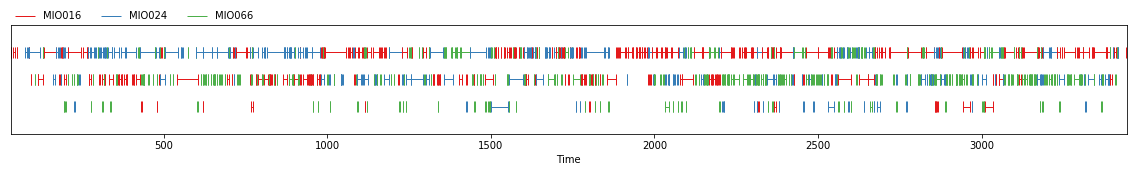

In [33]:
ref

In [29]:
file_name = 'li_bic.2.10.seg.bic_value.2.70.hac_value.20.00.viterbi.-250.00'

In [31]:
result_file = os.path.join(result_dir, file_name)
hyp = mdtm_convert_to_annote(.01, result_file, 'seg')


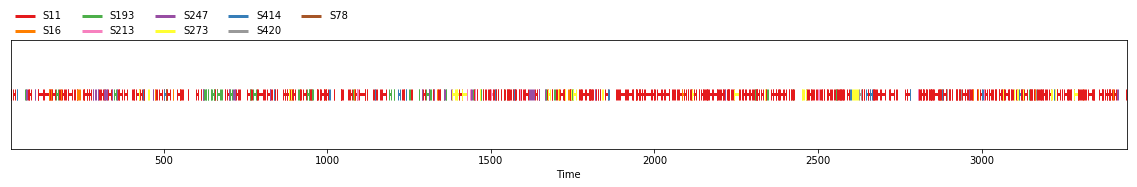

In [32]:
hyp

In [36]:
sad_path = os.path.join('sad', 'input_oracle_sad_IN1001.seg')

In [37]:
sad_seg = Diar.read_seg(sad_path)

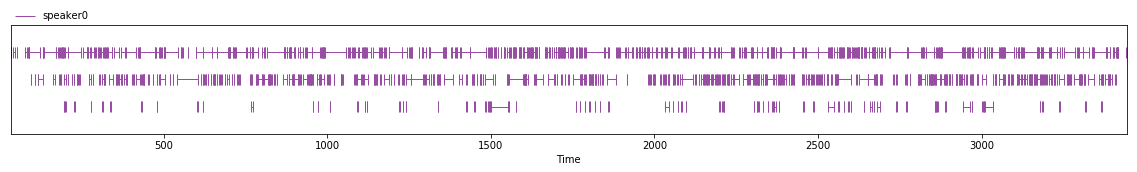

In [38]:
mdtm_convert_to_annote(.01, sad_path, 'seg')